In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import os
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

# Dataset

Dans ce TP, nous allons travailler avec le jeu de données que vous connaissez déjà qui concerne les dépenses de l'état. Commençons par le télécharger puis chargons le en mémoire dans un dataframe.

Si vous utilisez colab, vous devez d'abord télécharger le fichier de données sur le serveur colab en utilisant le morceau de code suivant:

In [ ]:
try:
    from google.colab import files

    uploaded = files.upload()

    for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
          name=fn, length=len(uploaded[fn])))
except:
    print("No google colab")
    pass

Saving depense_etat.txt to depense_etat.txt
User uploaded file "depense_etat.txt" with length 2280 bytes


In [4]:
#!more depense_etat.txt
data_source = 'dataset/data' #'../data/'
filename = 'depense_etat.txt'
filepath = os.path.join(data_source, filename)

df = pd.read_csv(filepath, delimiter="\s+")
attribute_names = df.columns
object_names = df.index
dataset = df.values


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bausm\AppData\Local\Temp\ipykernel_420\1465095025.py:6: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(filepath, delimiter="\s+")


**Exercice**
- Localisez le chemin d'accès vers le fichier de données sur la machine
- Chargez le dans une variable python en utilisant pandas

In [17]:
df=pd.read_csv("dataset/data/depense_etat.txt", delimiter="\s+")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\bausm\AppData\Local\Temp\ipykernel_420\2462937475.py:1: SyntaxWarning: invalid escape sequence '\s'
  df=pd.read_csv("dataset/data/depense_etat.txt", delimiter="\s+")


,PVP,AGR,CMI,TRA,LOG,EDU,ACS,ACO,DEF,DET,DIV
1872,18.0,0.5,0.1,6.7,0.5,2.1,2.0,0.0,26.4,41.5,2.1
1880,14.1,0.8,0.1,15.3,1.9,3.7,0.5,0.0,29.8,31.3,2.5
1890,13.6,0.7,0.7,6.8,0.6,7.1,0.7,0.0,33.8,34.4,1.7
1900,14.3,1.7,1.7,6.9,1.2,7.4,0.8,0.0,37.7,26.2,2.2
1903,10.3,1.5,0.4,9.3,0.6,8.5,0.9,0.0,38.4,27.2,3.0


# MultiDimensional Scaling (MDS)

**MDS est un outil qui permet de changer (réduire) la dimension des données tout en conservant les distances entre les exemples.** On utilise plutôt MDS pour visualiser les données lorsque seule la matrice de distance entre ces données est disponible. Toute fois dans ce TP, nous allons construire la matrice de distance par nous même à partir des données.

## Etapes du MDS:

1. Construire une matrice de distances carrées $\Delta^2$ entre les données
2. Double centrer cette matrice: $\Delta^* = -0.5 \boldsymbol{J} \Delta^2 \boldsymbol{J}$ où $\boldsymbol{J}$ est la matrice de centrage: $\boldsymbol{J} = \boldsymbol{I} - \frac{1}{n}\boldsymbol{11}^T$
3. Réaliser une décomposition en valeur propres de $\Delta^*$ puis récupérer les données en dimension réduites $\underbrace{\mathbf{X}}_{n\times p} = \underbrace{\mathbf{V}_p}_{n\times p} \underbrace{\Lambda^{\tfrac{1}{2}}_{p}}_{p\times p} $ . Attention, les valeurs propres et vecteurs propres à récupérer sont ceux qui ont les valeurs propres les plus élevées (qui contiennent le plus d'énergie de la matrice).

**Exercice:** (chaque fonction devrait être écrite dans une cellule différente)
- Ecrire une fonction qui construit la matrice des distances euclidiennes au carré entre les données (prend les données en entrée)
- Ecrire une fonction qui double centre une matrice d'entrée (prend une matrice carrée symétrique en entrée)
- Ecrire une fonction qui retourne les p premieres vecteurs propres et les racines carrées des p premières valeurs propres associées (prend une matrice carrée symétrique en entrée et un paramètre p)
- Ecrire une fonction qui réalise l'algorithme MDS à partir d'un jeu de données et d'une dimension souhaitée
- Appliquer l'algorithme MDS au jeu de données téléchargé précédemment afin d'afficher les données sur un graphique en deux dimensions

In [7]:
def get_dist_mat(X):
    D = euclidean_distances(X)**2
    return D

In [27]:
dataset.shape

(24, 11)

In [8]:
dists_tmp = get_dist_mat(dataset)
dists_tmp.shape

(24, 24)

In [9]:
n=dists_tmp.shape[0]
J = np.eye(n) - (1/n)*np.ones((n,n))

In [10]:
def double_center(D):
    n = D.shape[0]
    J = np.eye(n) - (1/n)*np.ones((n,n))
    return -0.5*np.dot(J, np.dot(D, J))

In [11]:
dists = double_center(dists_tmp)

In [12]:
def get_mds_dimensionality_reduction(D, p):
  eigvecs, eigvals, _ = np.linalg.svd(D)
  print(np.min(eigvals))
  X_new = np.dot(eigvecs[:, 0:p], np.diag(eigvals[0:p]**0.5))
  return X_new

In [13]:
new_data = get_mds_dimensionality_reduction(dists, 2)

print(new_data.shape)

1.83981772254573e-15
(24, 2)


Time taken to add text labels: 0.0070 seconds


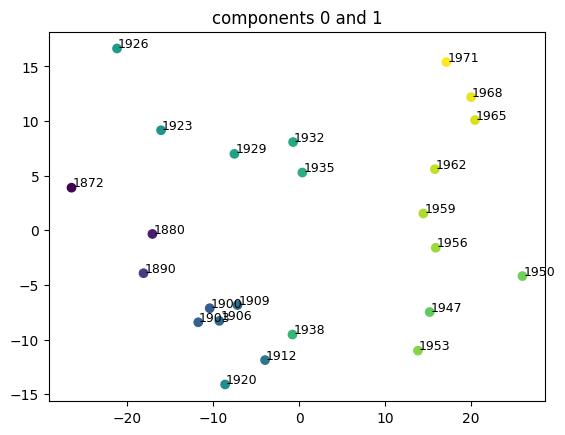

In [28]:
import time
start_time = time.time()

plt.figure()
plt.scatter(new_data[:,0], new_data[:,1], c=object_names)


for ind, label in enumerate(object_names):
    plt.text(new_data[ind,0]+0.1, new_data[ind,1]+0.1, label, fontsize=9)


plt.title("components 0 and 1")
plt.show()

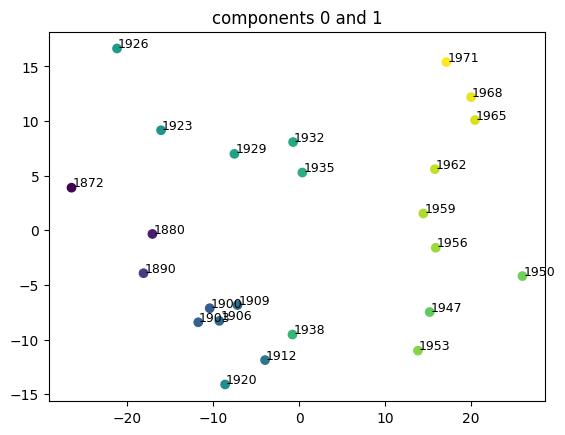

In [15]:
mds = MDS(random_state=42)
new_data = mds.fit_transform(dataset)

plt.figure()
plt.scatter(new_data[:,0], new_data[:,1], c=object_names)
for ind, label in enumerate(object_names):
    plt.text(new_data[ind,0]+0.1, new_data[ind,1]+0.1, label, fontsize=9)
plt.title("components 0 and 1")
plt.show()

In [16]:
dists

array([[ 668.36930556,  377.44013889,  416.58555556,  212.50472222,
         204.31097222,  176.42305556,  135.65013889,   17.50888889,
         125.98805556,  371.39013889,  571.93263889,  156.37805556,
         -23.88777778,  -65.79694444,  -56.85236111, -341.61611111,
        -379.54527778, -355.15902778, -343.00819444, -307.08902778,
        -348.30361111, -429.67444444, -424.82944444, -358.71944444],
       [ 377.44013889,  298.30097222,  251.24638889,  143.86555556,
         165.12180556,  133.02388889,  110.47097222,   53.24972222,
         148.93888889,  188.17097222,  277.10347222,   90.49888889,
         -27.38694444,  -55.53611111,  -31.13152778, -170.71527778,
        -207.18444444, -192.28819444, -217.05736111, -218.69819444,
        -248.76277778, -289.30361111, -315.01861111, -264.34861111],
       [ 416.58555556,  251.24638889,  316.60180556,  198.56097222,
         210.45722222,  182.85930556,  141.50638889,   87.76513889,
         158.14430556,  250.84638889,  326.678

Comme pour la plupart de ces techniques connues, il existe en existe une version déjà implémentée dans une bibliothèque python: `scikit-learn`.

**Exercice:**
- Utiliser l'algorithme MDS fourni par scikit-learn pour calculer une représentation en basse dimension des données
- Commenter les resultats obtenus
- Timer les deux méthodes

Temps pris par l'algo MDS: 0.0637 secondes


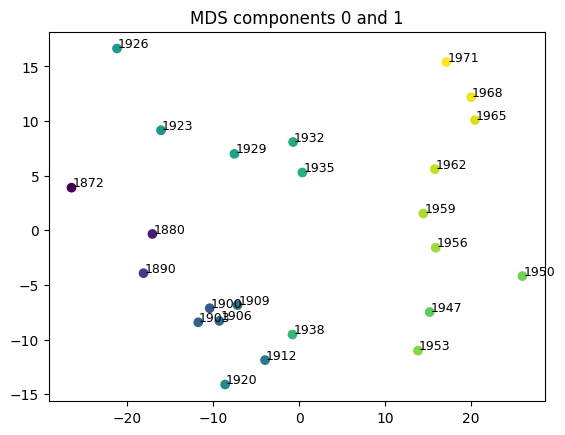

In [29]:
import time

# Time the MDS algorithm from scikit-learn
start_time = time.time()

# Apply MDS algorithm from scikit-learn
mds = MDS(random_state=42)
new_data = mds.fit_transform(dataset)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Temps pris par l'algo MDS: {elapsed_time:.4f} secondes")

# Plot the results
plt.figure()
plt.scatter(new_data[:,0], new_data[:,1], c=object_names)
for ind, label in enumerate(object_names):
    plt.text(new_data[ind,0]+0.1, new_data[ind,1]+0.1, label, fontsize=9)
plt.title("MDS components 0 and 1")
plt.show()

## Isomap

L'algorithme Isomap se base sur le fonctionnement de MDS mais utilise une matrice de distances *geodésiques* à la place d'une matrice de distances euclidiennes.


**Exercice:**
- Utiliser la fonction scikit-learn pour appliquer l'algorithme Isomap aux données
- Afficher les résultats en deux dimensions. Commenter les différences avec MDS.


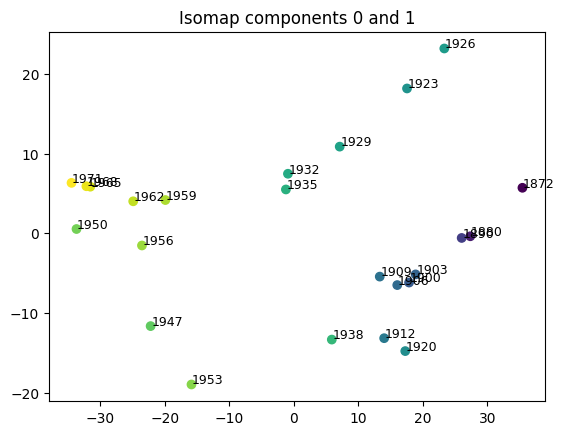

In [30]:
from sklearn.manifold import Isomap

# Apply Isomap algorithm from scikit-learn
isomap = Isomap(n_components=2)
new_data_isomap = isomap.fit_transform(dataset)

# Plot the results
plt.figure()
plt.scatter(new_data_isomap[:,0], new_data_isomap[:,1], c=object_names)
for ind, label in enumerate(object_names):
    plt.text(new_data_isomap[ind,0]+0.1, new_data_isomap[ind,1]+0.1, label, fontsize=9)
plt.title("Isomap components 0 and 1")
plt.show()

Il semble y avoir une symétrie verticale

**Bonus Exercice 1:**
- Utiliser les algorithmes MDS et Isomap pour afficher une représentation 3D des données


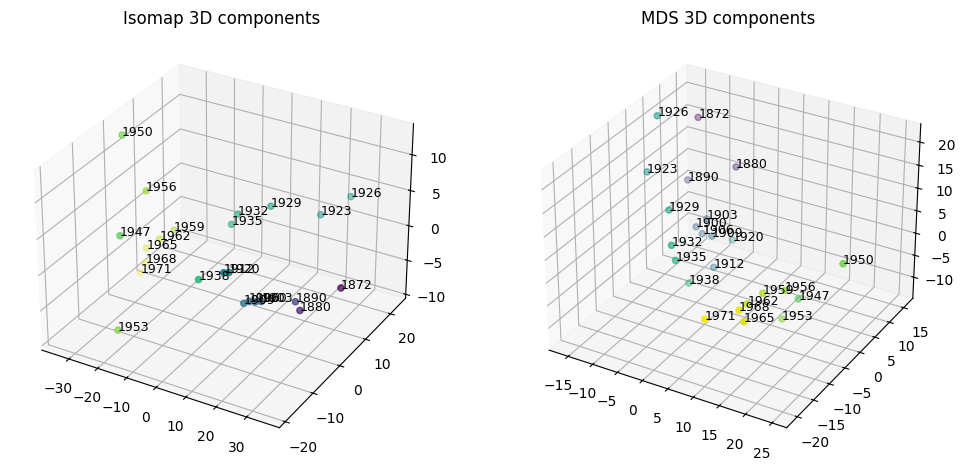

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Apply Isomap algorithm from scikit-learn for 3D
isomap_3d = Isomap(n_components=3)
new_data_isomap_3d = isomap_3d.fit_transform(dataset)

# Apply MDS algorithm from scikit-learn for 3D
mds_3d = MDS(n_components=3, random_state=42)
new_data_mds_3d = mds_3d.fit_transform(dataset)

# Plot the Isomap results in 3D
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, projection='3d')
ax.scatter(new_data_isomap_3d[:, 0], new_data_isomap_3d[:, 1], new_data_isomap_3d[:, 2], c=object_names)
for ind, label in enumerate(object_names):
    ax.text(new_data_isomap_3d[ind, 0], new_data_isomap_3d[ind, 1], new_data_isomap_3d[ind, 2], label, fontsize=9)
ax.set_title("Isomap 3D components")

# Plot the MDS results in 3D
ax = fig.add_subplot(122, projection='3d')
ax.scatter(new_data_mds_3d[:, 0], new_data_mds_3d[:, 1], new_data_mds_3d[:, 2], c=object_names)
for ind, label in enumerate(object_names):
    ax.text(new_data_mds_3d[ind, 0], new_data_mds_3d[ind, 1], new_data_mds_3d[ind, 2], label, fontsize=9)
ax.set_title("MDS 3D components")

plt.show()

**Bonus exercice 2: Implémenter une fonction de calcul des distances géodésiques**
- Trouver les k plus proches voisins de chaque point (scikit learn nearest neighbours)
- Construire le graphe des plus proches voisins (la solution la plus simple est d'utiliser 1 comme poids d'arrête)
- Calculer le chemin le plus court entre chaque point étant donné ce graphe (Algorithme Floyd-Warshall ou Djikstra)
- Retourner la matrice ainsi construite
- Utiliser cette matrice de distances dans votre algorithme MDS
- Afficher le résultat

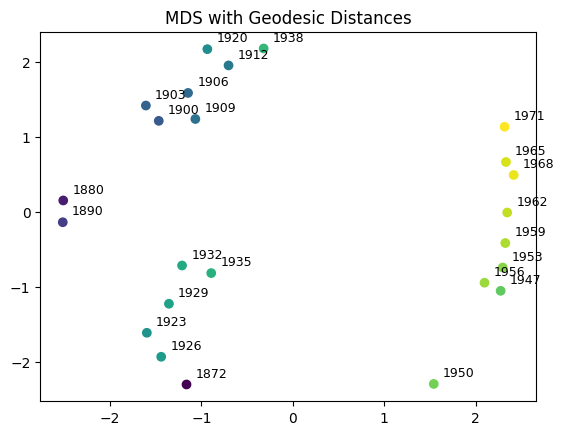

In [37]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import floyd_warshall
k = 5 #nbre de voisisns
kvoisins = NearestNeighbors(n_neighbors=k)
kvoisins.fit(dataset)
distances, indices = kvoisins.kneighbors(dataset)
# graphe plus proches voisins
n_samples = dataset.shape[0]
graph = np.zeros((n_samples, n_samples))

for i in range(n_samples):
    for j in indices[i]:
        if i != j:
            graph[i, j] = 1

# conversion en format sparse 
graph_sparse = csr_matrix(graph)
# calcul des distances geodesiques
geodesic_distances = floyd_warshall(graph_sparse)


geodesic_distances[np.isinf(geodesic_distances)] = np.max(geodesic_distances[np.isfinite(geodesic_distances)])


geodesic_distances = (geodesic_distances + geodesic_distances.T) / 2

mds_geodesic = MDS( dissimilarity='precomputed',random_state=42)
new_data_geodesic = mds_geodesic.fit_transform(geodesic_distances)

# Plot the results
plt.figure()
plt.scatter(new_data_geodesic[:, 0], new_data_geodesic[:, 1], c=object_names)
for ind, label in enumerate(object_names):
    plt.text(new_data_geodesic[ind, 0] + 0.1, new_data_geodesic[ind, 1] + 0.1, label, fontsize=9)
plt.title("MDS with Geodesic Distances")
plt.show()

In [35]:
print(distances)
print(indices)
print(graph)    

[[ 0.         12.32071427 14.55300656 15.08244012 16.83953681]
 [ 0.         10.60235823 12.92013932 13.2947358  13.72370212]
 [ 0.          9.25526877  9.72419662 10.51998099 10.60235823]
 [ 0.          2.83019434  4.97895571  5.21536192  9.2244241 ]
 [ 0.          4.09023227  5.21536192  5.78013841  9.13619177]
 [ 0.          2.83019434  3.20312348  4.09023227  7.11758386]
 [ 0.          3.20312348  4.97895571  5.78013841  6.20805928]
 [ 0.          6.20805928  7.11758386  7.91580697  8.33186654]
 [ 0.          8.33186654  8.39523674  9.13619177  9.26066952]
 [ 0.         11.24944443 12.17743815 13.1487642  16.73140759]
 [ 0.         12.17743815 15.08244012 18.51917925 19.1368754 ]
 [ 0.          8.29638475  9.64157663 11.24944443 15.35740864]
 [ 0.          5.09215082  8.29638475 15.72450317 17.81796846]
 [ 0.          5.09215082  9.64157663 13.24424403 16.13722405]
 [ 0.          7.91580697 10.6855042  11.35429434 11.77964346]
 [ 0.          8.08455317  9.4        11.12924076 13.60